In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import dill
import sys
sys.path.append('../')
from modelfitting import tnr_npv_curve, train_test_split, ROC_curve, PR_curve, stable_unstable_hist, calibration_plot, unstable_error_fraction
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

# Paths to where we store the training data and the models

In [41]:
datapath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/training_data/'
modelpath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/models/'
models = {'N-body':'shadowtimesxgb_random', 'SPOCK':'spock_random', 'Hill':'HillSpheresxgb_random', 'MEGNO':'megnoxgb_random', 'AMD':'AMD_random'}

# Resonant

N-body 0.98805996054827
SPOCK 0.9545316912427042
Hill 0.6909361107486326
MEGNO 0.8530296369401977
AMD 0.7542552504120641


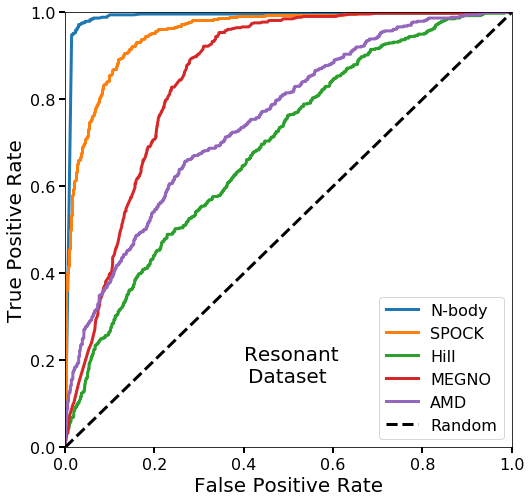

In [42]:
models = {'N-body':'shadowtimesxgb_resonant', 'SPOCK':'spock12_resonant1e4', 'Hill':'HillSpheresxgb_resonant', 'MEGNO':'megnoxgb_resonant', 'AMD':'AMD_resonant'}
testing_dataset = 'resonant'

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')


for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features, filtertimes=True)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random')
ax.text(0.4, 0.2, "Resonant", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.legend()
fig.savefig('resperformance.pdf', bbox_inches='tight')

N-body 0.98805996054827
SPOCK 0.9545316912427042
Hill 0.6909361107486326
MEGNO 0.8530296369401977
AMD 0.7542552504120641


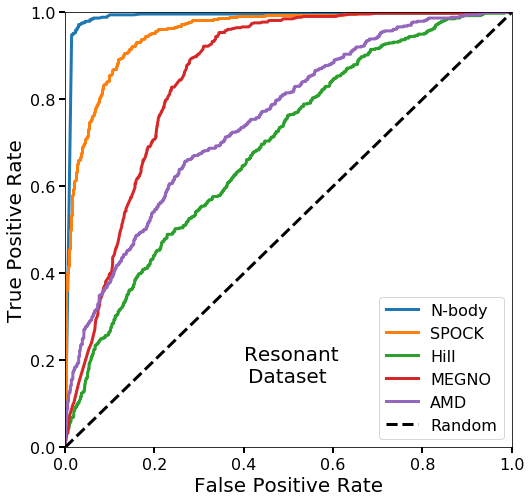

In [39]:
models = {'N-body':'shadowtimesxgb_resonant', 'SPOCK':'spock12_resonant', 'Hill':'HillSpheresxgb_resonant', 'MEGNO':'megnoxgb_resonant', 'AMD':'AMD_resonant'}
testing_dataset = 'resonant'

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')


for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features, filtertimes=True)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random')
ax.text(0.4, 0.2, "Resonant", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.legend()
fig.savefig('resperformance.pdf', bbox_inches='tight')

In [38]:
thresh = 0.1

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features,  filtertimes=True)
    threshindex = np.where(fpr > thresh)[0][0]
    print(name, "thresh = {0:.3f}".format(ROCthresholds[threshindex]),  "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

N-body thresh = 0.133 TPR = 0.994 FPR = 0.100
SPOCK thresh = 0.578 TPR = 0.861 FPR = 0.100
SPOCK12 thresh = 0.505 TPR = 0.856 FPR = 0.103
Hill thresh = 0.908 TPR = 0.266 FPR = 0.101
MEGNO thresh = 0.713 TPR = 0.397 FPR = 0.100
AMD thresh = 0.843 TPR = 0.379 FPR = 0.101


In [33]:
TPRthresh = 0.9

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features,  filtertimes=True)
    threshindex = np.where(tpr > TPRthresh)[0][0]
    print(name, "thresh = {0:.3f}".format(ROCthresholds[threshindex]),  "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

N-body thresh = 0.989 TPR = 0.948 FPR = 0.014
SPOCK thresh = 0.342 TPR = 0.900 FPR = 0.127
SPOCKt thresh = 0.444 TPR = 0.904 FPR = 0.132
SPOCKtA thresh = 0.290 TPR = 0.904 FPR = 0.132
Hill thresh = 0.606 TPR = 0.900 FPR = 0.670
MEGNO thresh = 0.411 TPR = 0.900 FPR = 0.294
AMD thresh = 0.507 TPR = 0.904 FPR = 0.624


# Summary

N-body 0.9918003216802035
SPOCK 0.987473607327298
Hill 0.8455018474242544
MEGNO 0.9618102361596498
AMD 0.9009539817015272


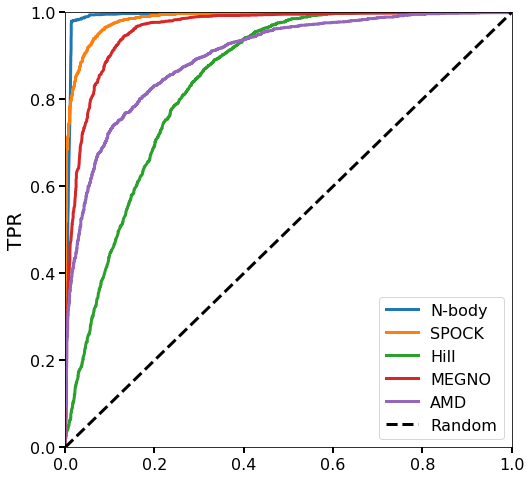

In [3]:
testing_dataset = 'random'

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random')

ax.legend()
fig.savefig('summary.pdf', bbox_inches='tight')

# Both datasets, filter random for tinst > 1e4

*** random
N-body 0.983798792090676
SPOCK 0.9753546785802929
Hill 0.754332092330603
MEGNO 0.9263004881277406
AMD 0.8659243815669728
*** random
N-body 0.98805996054827
SPOCK 0.9478284445198963
Hill 0.6909361107486326
MEGNO 0.8530296369401977
AMD 0.7542552504120641


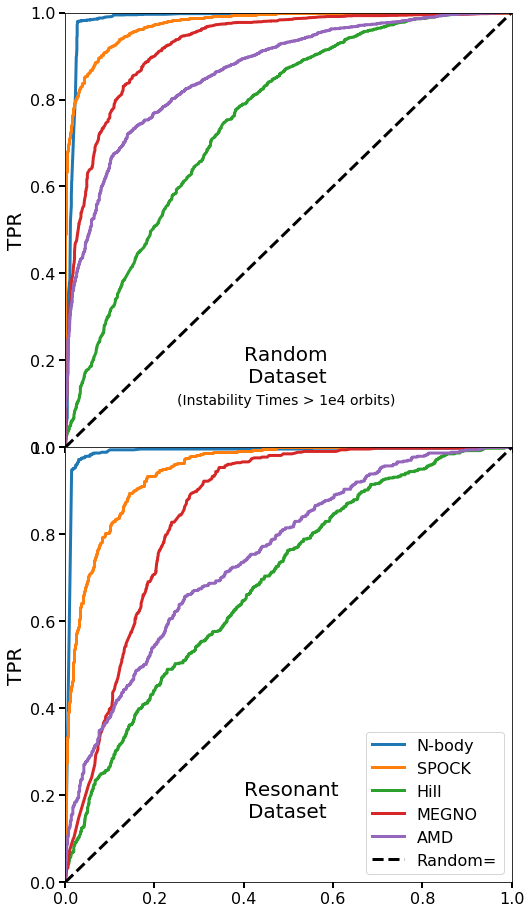

In [14]:
models = {'N-body':'shadowtimesxgb_random', 'SPOCK':'spock_random', 'Hill':'HillSpheresxgb_random', 'MEGNO':'megnoxgb_random', 'AMD':'AMD_random'}
testing_dataset = 'random'

fig, axarr = plt.subplots(figsize=(8,16), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

print('***', testing_dataset)
ax = axarr[0]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')


for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features, filtertimes=True)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.text(0.4, 0.2, "Random", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.text(0.25, 0.1, "(Instability Times > 1e4 orbits)", fontsize=14)
print('***', testing_dataset)
models = {'N-body':'shadowtimesxgb_resonant', 'SPOCK':'spock_resonant', 'Hill':'HillSpheresxgb_resonant', 'MEGNO':'megnoxgb_resonant', 'AMD':'AMD_resonant'}
testing_dataset = 'resonant'

ax = axarr[1]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features, filtertimes=True)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random=')
ax.text(0.4, 0.2, "Resonant", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.legend()
fig.savefig('randomresonantcomparison.pdf', bbox_inches='tight')

*** random
N-body 0.983798792090676
SPOCK 0.9774024985521634
Hill 0.754332092330603
MEGNO 0.9263004881277406
AMD 0.8659243815669728
*** random
N-body 0.98805996054827
SPOCK 0.9576793413056065
Hill 0.6909361107486326
MEGNO 0.8530296369401977
AMD 0.7542552504120641


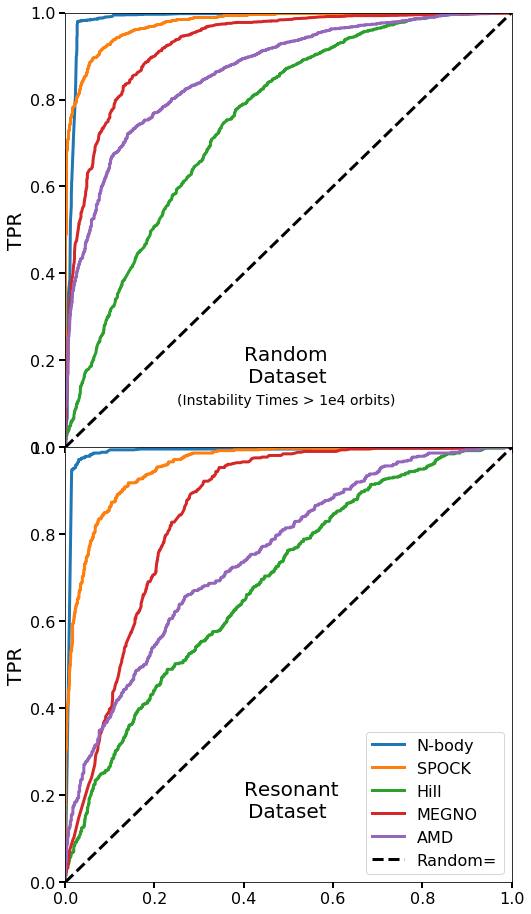

In [5]:
c
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')


for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features, filtertimes=True)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.text(0.4, 0.2, "Random", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.text(0.25, 0.1, "(Instability Times > 1e4 orbits)", fontsize=14)

testing_dataset = 'resonant'

print('***', testing_dataset)
models = {'N-body':'shadowtimesxgb_resonant', 'SPOCK':'spockv2Emed_resonant', 'Hill':'HillSpheresxgb_resonant', 'MEGNO':'megnoxgb_resonant', 'AMD':'AMD_resonant'}

ax = axarr[1]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features, filtertimes=True)
    print(name, roc_auc)
    ax.plot(fpr, tpr, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random=')
ax.text(0.4, 0.2, "Resonant", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.legend()
fig.savefig('randomresonantcomparison.pdf', bbox_inches='tight')

In [6]:
thresh = 0.1

for testing_dataset in ['random', 'resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features,  filtertimes=True)
        threshindex = np.where(fpr > thresh)[0][0]
        print(name, "thresh = {0:.3f}".format(ROCthresholds[threshindex]),  "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***random***
N-body thresh = 0.255 TPR = 0.993 FPR = 0.103
SPOCK thresh = 0.722 TPR = 0.911 FPR = 0.101
Hill thresh = 0.932 TPR = 0.274 FPR = 0.101
MEGNO thresh = 0.684 TPR = 0.767 FPR = 0.101
AMD thresh = 0.882 TPR = 0.611 FPR = 0.101
***resonant***
N-body thresh = 0.133 TPR = 0.994 FPR = 0.100
SPOCK thresh = 0.578 TPR = 0.861 FPR = 0.100
Hill thresh = 0.908 TPR = 0.266 FPR = 0.101
MEGNO thresh = 0.713 TPR = 0.397 FPR = 0.100
AMD thresh = 0.843 TPR = 0.379 FPR = 0.101


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


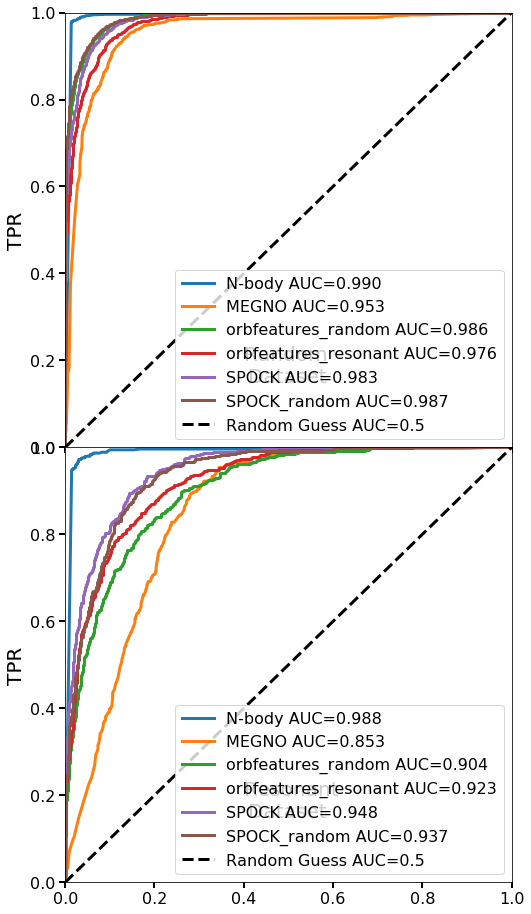

In [4]:
models = {'N-body':'shadowtimesxgb_resonant', 'MEGNO':'megnoxgb_resonant', 'orbfeatures_random':'orbsummaryfeaturesxgb_random','orbfeatures_resonant':'orbsummaryfeaturesxgb_resonant', 'SPOCK':'spock_resonant', 'SPOCK_random':'spock_random'}

testing_dataset = 'random'

fig, axarr = plt.subplots(figsize=(8,16), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

ax = axarr[0]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0} AUC={1:.3f}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.text(0.4, 0.2, "Random", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)

ax.legend()
testing_dataset = 'resonant'

ax = axarr[1]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0} AUC={1:.3f}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.text(0.4, 0.2, "Resonant", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)
ax.legend()

In [22]:
thresh = 0.1

for testing_dataset in ['random', 'resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(fpr > thresh)[0][0]
        print(name, "thresh = {0:.3f}".format(ROCthresholds[threshindex]),  "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***random***
N-body thresh = 0.062 TPR = 0.996 FPR = 0.101
MEGNO thresh = 0.524 TPR = 0.891 FPR = 0.100


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


orbfeatures_random thresh = 0.331 TPR = 0.968 FPR = 0.101
orbfeatures_resonant thresh = 0.268 TPR = 0.933 FPR = 0.100
SPOCK thresh = 0.382 TPR = 0.960 FPR = 0.101
SPOCK_random thresh = 0.414 TPR = 0.973 FPR = 0.103
***resonant***
N-body thresh = 0.133 TPR = 0.994 FPR = 0.100
MEGNO thresh = 0.713 TPR = 0.397 FPR = 0.100


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


orbfeatures_random thresh = 0.332 TPR = 0.684 FPR = 0.100
orbfeatures_resonant thresh = 0.516 TPR = 0.752 FPR = 0.101
SPOCK thresh = 0.714 TPR = 0.810 FPR = 0.100
SPOCK_random thresh = 0.739 TPR = 0.787 FPR = 0.100


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/models/shadowtimesxgb_resonantresonant.pkl'

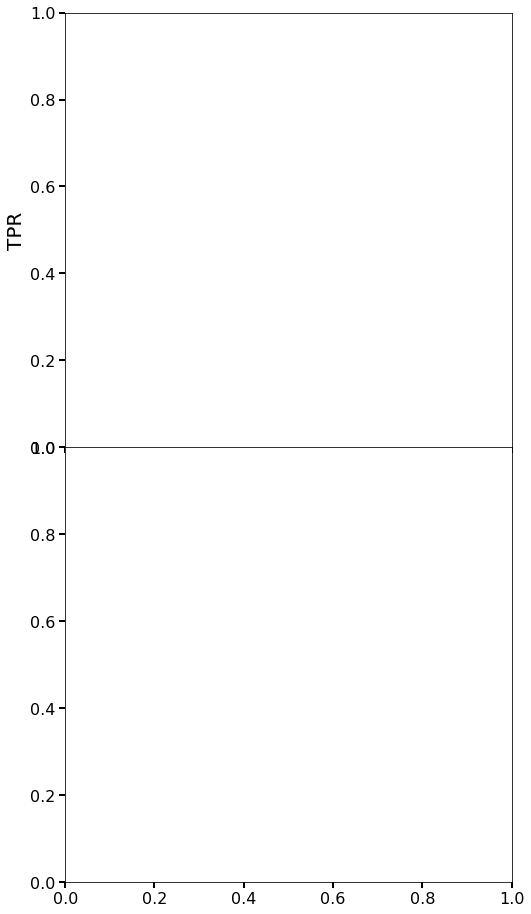

In [13]:
testing_dataset = 'resonant'

fig, axarr = plt.subplots(figsize=(8,16), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

ax = axarr[0]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0} AUC={1:.3f}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.text(0.4, 0.2, "Random", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)

testing_dataset = 'resonant'

ax = axarr[1]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random')
ax.legend()
ax.text(0.38, 0.2, "Resonant", fontsize=20)
ax.text(0.4, 0.15, "Dataset", fontsize=20)
fig.savefig('summary.pdf', bbox_inches='tight')

9 feat

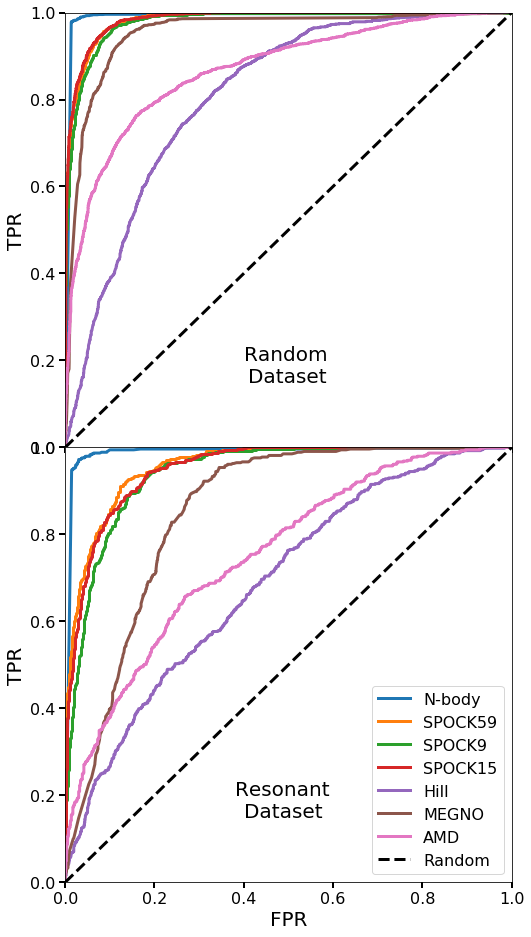

In [3]:
testing_dataset = 'random'

fig, axarr = plt.subplots(figsize=(8,16), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

ax = axarr[0]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'resonant.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0} AUC={1:.3f}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.text(0.4, 0.2, "Random", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)

testing_dataset = 'resonant'

ax = axarr[1]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+'resonant.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random')
ax.legend()
ax.text(0.38, 0.2, "Resonant", fontsize=20)
ax.text(0.4, 0.15, "Dataset", fontsize=20)
fig.savefig('compareSPOCKNfeatures.pdf', bbox_inches='tight')

In [21]:
thresh = 0.9

for testing_dataset in ['random', 'resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(tpr > thresh)[0][0]
        print(name, "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***random***
Ideal TPR = 0.9019807008633824 FPR = 0.012867040580666447
SPOCK TPR = 0.9009649568308786 FPR = 0.024744308808973936
Hill TPR = 0.9004570848146267 FPR = 0.35037941273507095
MEGNO TPR = 0.9009649568308786 FPR = 0.10128670405806664
AMD TPR = 0.9004570848146267 FPR = 0.3134279115803365
***resonant***
Ideal TPR = 0.9482439926062847 FPR = 0.01439342015078821
SPOCK TPR = 0.9020332717190388 FPR = 0.12200137080191913
Hill TPR = 0.9001848428835489 FPR = 0.6703221384509939
MEGNO TPR = 0.9001848428835489 FPR = 0.29403701165181634
AMD TPR = 0.9038817005545287 FPR = 0.6244002741603838


In [13]:
thresh = 0.1

for testing_dataset in ['resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in mocdels.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(fpr > thresh)[0][0]
        print(name, "thresh = {0:.3f}".format(ROCthresholds[threshindex]),  "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***resonant***
N-body thresh = 0.133 TPR = 0.994 FPR = 0.100
SPOCK thresh = 0.642 TPR = 0.837 FPR = 0.101
Hill thresh = 0.908 TPR = 0.266 FPR = 0.101
MEGNO thresh = 0.713 TPR = 0.397 FPR = 0.100
AMD thresh = 0.843 TPR = 0.379 FPR = 0.101


In [35]:
thresh = 0.1

for testing_dataset in ['random', 'resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(fpr > thresh)[0][0]
        print(name, "thresh = {0:.3f}".format(ROCthresholds[threshindex]),  "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***random***
N-body thresh = 0.020 TPR = 0.996 FPR = 0.102
SPOCK thresh = 0.210 TPR = 0.981 FPR = 0.100
Hill thresh = 0.715 TPR = 0.448 FPR = 0.102
MEGNO thresh = 0.663 TPR = 0.900 FPR = 0.100
AMD thresh = 0.668 TPR = 0.727 FPR = 0.100
***resonant***
N-body thresh = 0.133 TPR = 0.994 FPR = 0.100
SPOCK thresh = 0.476 TPR = 0.854 FPR = 0.101
Hill thresh = 0.908 TPR = 0.266 FPR = 0.101
MEGNO thresh = 0.713 TPR = 0.397 FPR = 0.100
AMD thresh = 0.843 TPR = 0.379 FPR = 0.101


In [14]:
thresh = 0.95

for testing_dataset in ['resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(tpr > thresh)[0][0]
        print(name, "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***resonant***
N-body TPR = 0.950 FPR = 0.017
SPOCK TPR = 0.950 FPR = 0.197
Hill TPR = 0.950 FPR = 0.791
MEGNO TPR = 0.950 FPR = 0.344
AMD TPR = 0.950 FPR = 0.704


In [23]:
thresh = 0.95

for testing_dataset in ['random', 'resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(tpr > thresh)[0][0]
        print(name, "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***random***
Ideal TPR = 0.952260030472321 FPR = 0.013526888815572418
SPOCK TPR = 0.9507364144235653 FPR = 0.051798086440118775
Hill TPR = 0.9512442864398172 FPR = 0.4209831738700099
MEGNO TPR = 0.9512442864398172 FPR = 0.1418673705047839
AMD TPR = 0.9502285424073134 FPR = 0.43846915209501813
***resonant***
Ideal TPR = 0.9500924214417745 FPR = 0.017135023989033583
SPOCK TPR = 0.9500924214417745 FPR = 0.20013708019191226
Hill TPR = 0.9500924214417745 FPR = 0.7909527073337903
MEGNO TPR = 0.9500924214417745 FPR = 0.3440712816997944
AMD TPR = 0.9500924214417745 FPR = 0.7039067854694997


In [15]:
thresh = 0.99

for testing_dataset in ['resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(tpr > thresh)[0][0]
        print(name, "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***resonant***
N-body TPR = 0.991 FPR = 0.095
SPOCK TPR = 0.991 FPR = 0.345
Hill TPR = 0.991 FPR = 0.886
MEGNO TPR = 0.991 FPR = 0.535
AMD TPR = 0.991 FPR = 0.883


In [22]:
thresh = 0.99

for testing_dataset in ['random', 'resonant']:
    print("***{0}***".format(testing_dataset))
    for name, filename in models.items():
        model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
        testingdatafolder = datapath+testing_dataset+'/'+featurefolder
        roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
        threshindex = np.where(tpr > thresh)[0][0]
        print(name, "TPR = {0:.3f}".format(tpr[threshindex]), "FPR = {0:.3f}".format(fpr[threshindex]))

***random***
Ideal TPR = 0.9903504316912138 FPR = 0.04849884526558892
SPOCK TPR = 0.9903504316912138 FPR = 0.1280105575717585
Hill TPR = 0.9908583037074657 FPR = 0.5427251732101617
MEGNO TPR = 0.9903504316912138 FPR = 0.29693170570768723
AMD TPR = 0.9903504316912138 FPR = 0.7354008578027054
***resonant***
Ideal TPR = 0.9907578558225508 FPR = 0.09458533241946539
SPOCK TPR = 0.9907578558225508 FPR = 0.3159698423577793
Hill TPR = 0.9907578558225508 FPR = 0.8855380397532556
MEGNO TPR = 0.9907578558225508 FPR = 0.5346127484578478
AMD TPR = 0.9907578558225508 FPR = 0.8834818368745716


# TNR NPV curve

../modelfitting.py:58: RuntimeWarning: invalid value encountered in long_scalars
  npv[i] = tn/(tn+fn)


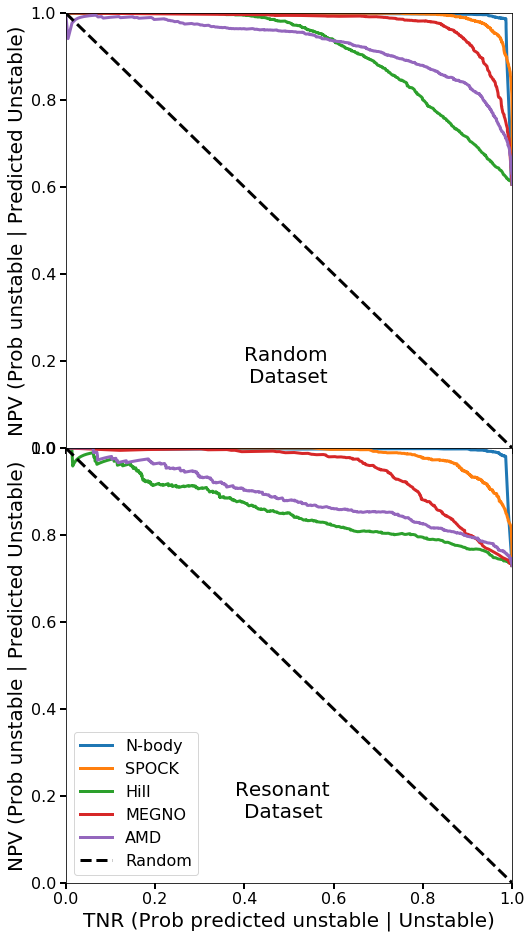

In [34]:
testing_dataset = 'random'

fig, axarr = plt.subplots(figsize=(8,16), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)

ax = axarr[0]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('NPV (Prob unstable | Predicted Unstable)')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    auc, npv, tnr, thresholds = tnr_npv_curve(testingdatafolder, model, features)
    ax.plot(tnr, npv)

ax.plot(np.linspace(0,1), np.linspace(1,0), 'k--')
ax.text(0.4, 0.2, "Random", fontsize=20)
ax.text(0.41, 0.15, "Dataset", fontsize=20)

testing_dataset = 'resonant'

ax = axarr[1]
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('TNR (Prob predicted unstable | Unstable)')
ax.set_ylabel('NPV (Prob unstable | Predicted Unstable)')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    auc, npv, tnr, thresholds = tnr_npv_curve(testingdatafolder, model, features)
    ax.plot(tnr, npv, label='{0}'.format(name))

ax.plot(np.linspace(0,1), np.linspace(1,0), 'k--', label='Random')
ax.legend()
ax.text(0.38, 0.2, "Resonant", fontsize=20)
ax.text(0.4, 0.15, "Dataset", fontsize=20)
fig.savefig('tnrnpv.pdf', bbox_inches='tight')

# Check how the prediction fidelity varies with how long a system takes to go unstable

We can't subdivide the systems that stayed stable to 1e9 orbits, but we can take all the unstable systems and divide them into bins based on their actual instability times. We can then ask, in each of those bins, what fraction of the systems did the model mispredict, i.e., what fraction did the model say would be stable but the system was actually unstable? Shows, as expected, that it's harder to predict stability the longer the instability time is away from our short integrations of $10^4$ orbits

../modelfitting.py:99: RuntimeWarning: divide by zero encountered in true_divide
  errorbars.append(np.sqrt(1./Nerrors + 1./hist[i])*errorfracs[-1]) # see calibration plot comment
../modelfitting.py:99: RuntimeWarning: invalid value encountered in double_scalars
  errorbars.append(np.sqrt(1./Nerrors + 1./hist[i])*errorfracs[-1]) # see calibration plot comment


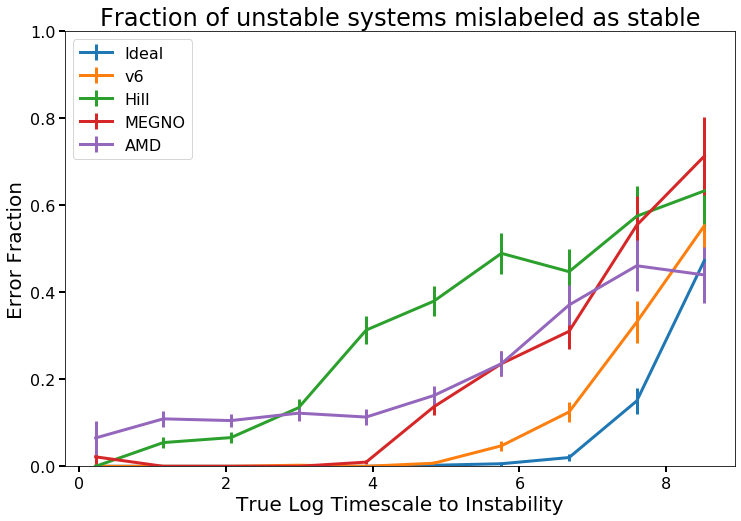

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('True Log Timescale to Instability')
ax.set_ylabel('Error Fraction')
ax.set_title('Fraction of unstable systems mislabeled as stable')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    bincenters, errorfracs, errorbars = unstable_error_fraction(testingdatafolder, model, features, bins=10)
    ax.errorbar(bincenters, errorfracs, errorbars, label='{0}'.format(name))

ax.legend()

# Train on Resonant, Test on Resonant

In [8]:
testing_dataset = 'resonant'

# ROC Curve

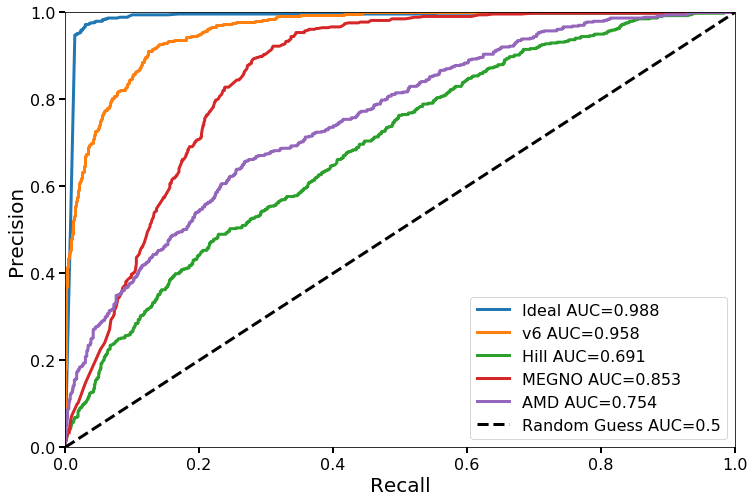

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    roc_auc, fpr, tpr, ROCthresholds = ROC_curve(testingdatafolder, model, features)
    ax.plot(fpr, tpr, label='{0} AUC={1:.3f}'.format(name, roc_auc))

ax.plot(np.linspace(0,1), np.linspace(0,1), 'k--', label='Random Guess AUC=0.5')
ax.legend()

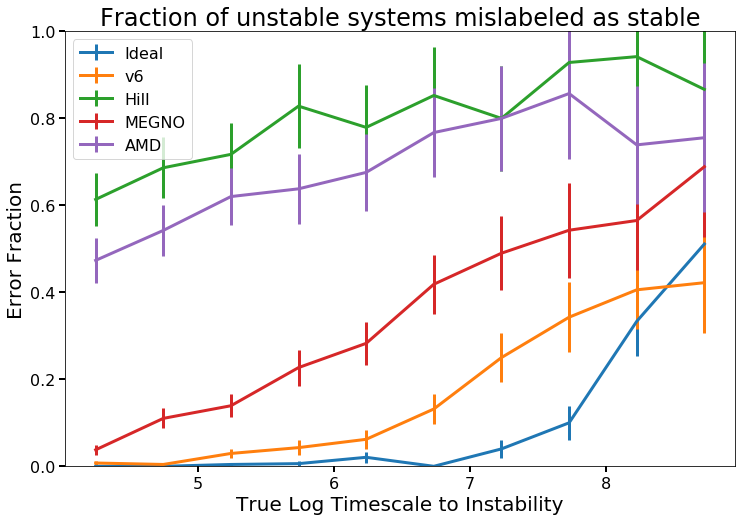

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('True Log Timescale to Instability')
ax.set_ylabel('Error Fraction')
ax.set_title('Fraction of unstable systems mislabeled as stable')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    bincenters, errorfracs, errorbars = unstable_error_fraction(testingdatafolder, model, features, bins=10)
    ax.errorbar(bincenters, errorfracs, errorbars, label='{0}'.format(name))

ax.legend()